<center><h1 class="list-group-item list-group-item-success">Importing Libraries</h1></center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# feature extractoring and preprocessing data
import librosa
import os
import pandas as pd
import numpy as np
from PIL import Image
import pathlib
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Result Analysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#for graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<center><h1 class="list-group-item list-group-item-success">Extracting the Spectrogram for every Audio</h1></center>

In [4]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'asavari bageshree bhairavi bhoopali darbari dkanada malkauns sarangi yaman'.split()
for g in genres:
    pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(f'./input/genres/{g}'):
        songname = f'./input/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=5)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
        plt.clf()

<Figure size 720x720 with 0 Axes>

In [5]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [6]:
print(header)

['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


<center><h1 class="list-group-item list-group-item-success">Converting Audio data into Numerical data</h1></center>

In [7]:
file = open('NumericalAudioData.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'asavari bageshree bhairavi bhoopali darbari dkanada malkauns sarangi yaman'.split()
for g in genres:
    for filename in os.listdir(f'input/genres/{g}'):
        songname = f'input/genres/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('NumericalAudioData.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

<center><h1 class="list-group-item list-group-item-success">Loading Numerical Data</h1></center>

In [8]:
data = pd.read_csv(filepath_or_buffer='NumericalAudioData_1.csv')
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,asavari01.wav,0.300161,0.324961,1206.567621,1155.074452,1964.063124,0.074107,-91.933968,161.099350,-74.488129,...,-15.075149,2.221334,-13.635890,-0.755338,-8.236355,-22.957357,-7.823898,-16.780188,-16.577990,asavari
1,asavari02.wav,0.327850,0.284077,1427.434167,1217.015600,2564.101162,0.092367,-91.262489,158.845825,-97.338806,...,-21.968050,-4.073037,-15.467768,-5.395582,-16.699156,-21.583614,-9.299034,-17.798979,-12.778995,asavari
2,asavari03.wav,0.327850,0.284077,1427.435947,1217.020555,2564.117828,0.092369,-91.262520,158.845764,-97.338806,...,-21.968170,-4.073009,-15.467854,-5.395608,-16.699158,-21.583727,-9.298958,-17.799126,-12.778892,asavari
3,asavari04.wav,0.321701,0.237798,1199.283236,1119.983898,1982.813010,0.076578,-134.367966,170.141495,-64.378136,...,-18.552418,-7.358620,-9.861775,-6.847193,-5.516914,-16.985310,-3.949524,-11.181010,-13.042615,asavari
4,asavari05.wav,0.280912,0.328013,1176.467509,1109.866943,1948.938215,0.069996,-86.146996,171.169571,-77.141792,...,-25.675896,1.374275,-12.453374,-13.393021,-13.500705,-14.911995,2.030809,-11.524114,-14.092502,asavari


In [9]:
print(data.shape)

(656, 28)


In [10]:
data["label"].value_counts()

bageshree    96
bhoopali     80
bhairavi     80
malkauns     80
sarangi      80
yaman        80
asavari      80
darbari      40
dkanada      40
Name: label, dtype: int64

<center><h1 class="list-group-item list-group-item-success"> Data Visualization</h1></center>

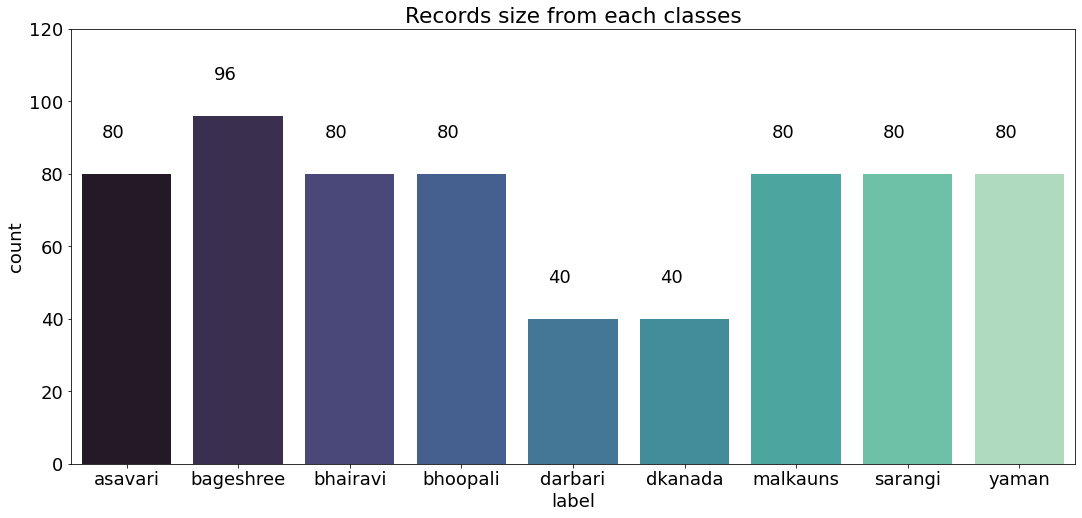

In [11]:
plt.figure(figsize=(18,8))
plt.rcParams["font.size"]=18
ax=sns.countplot("label",data=data,palette="mako")
plt.title(label="Records size from each classes")
plt.ylim(0,120)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.18,p.get_height()+10))
plt.show()

In [12]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [13]:
data.shape

(656, 27)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         656 non-null    float64
 1   rmse                656 non-null    float64
 2   spectral_centroid   656 non-null    float64
 3   spectral_bandwidth  656 non-null    float64
 4   rolloff             656 non-null    float64
 5   zero_crossing_rate  656 non-null    float64
 6   mfcc1               656 non-null    float64
 7   mfcc2               656 non-null    float64
 8   mfcc3               656 non-null    float64
 9   mfcc4               656 non-null    float64
 10  mfcc5               656 non-null    float64
 11  mfcc6               656 non-null    float64
 12  mfcc7               656 non-null    float64
 13  mfcc8               656 non-null    float64
 14  mfcc9               656 non-null    float64
 15  mfcc10              656 non-null    float64
 16  mfcc11  

<center><h1 class="list-group-item list-group-item-success">Encoding Labels</h1></center>

In [15]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

In [16]:
data['label'] = y

In [17]:
X=data.drop(labels="label",axis=1)
y=data["label"]

In [18]:
y.value_counts()

1    96
0    80
2    80
3    80
6    80
7    80
8    80
4    40
5    40
Name: label, dtype: int64

In [19]:
X.isnull().sum()

chroma_stft           0
rmse                  0
spectral_centroid     0
spectral_bandwidth    0
rolloff               0
zero_crossing_rate    0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
mfcc20                0
dtype: int64

<center><h1 class="list-group-item list-group-item-success">Oversampling Low Records Classes</h1></center>

In [20]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=3)
X,y=smote.fit_resample(X,y)

In [21]:
y.value_counts()

0    96
1    96
2    96
3    96
4    96
5    96
6    96
7    96
8    96
Name: label, dtype: int64

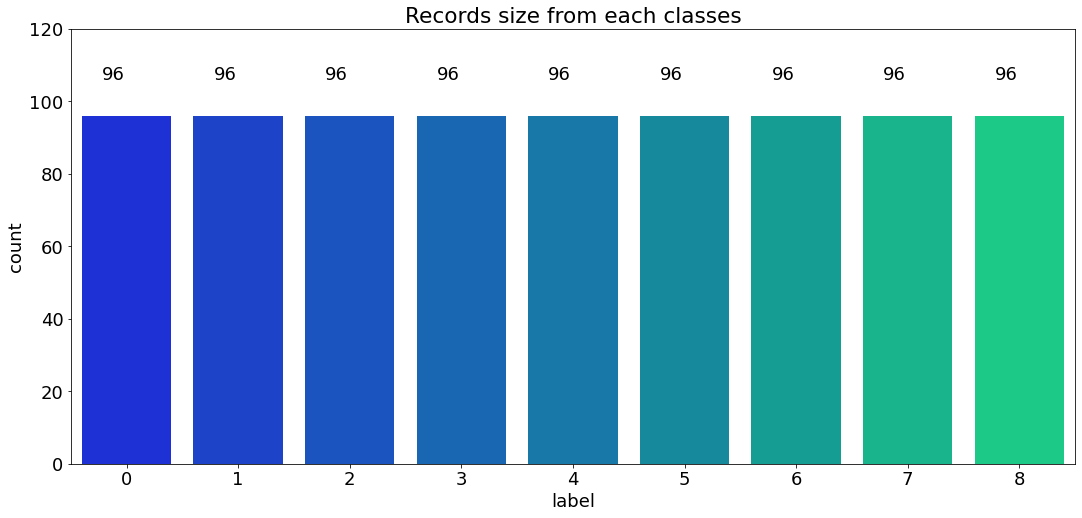

In [22]:
plt.figure(figsize=(18,8))
plt.rcParams["font.size"]=18
ax=sns.countplot(y,palette="winter")
plt.title(label="Records size from each classes")
plt.ylim(0,120)
for p in ax.patches:
    ax.annotate((p.get_height()),(p.get_x()+0.18,p.get_height()+10))
plt.show()

<center><h1 class="list-group-item list-group-item-success">Data Splitting</h1></center>

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=120,shuffle= True)

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(777, 26) (87, 26) (777,) (87,)


<center><h1 class="list-group-item list-group-item-success">Algorithm-1 SupportVectorClassifier</h1></center>

## Model Building

In [25]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

## Model Prediction

In [26]:
predictions_svm = model_svm.predict(X_test)

## Result Analysis

***Accuracy***

In [27]:
acc_svm = accuracy_score(y_true=y_test, y_pred= predictions_svm)
print("Overall accuracy of SVM model using test-set is : %f" %(acc_svm*100))

Overall accuracy of SVM model using test-set is : 26.436782


***Classification Report***

In [28]:
print(classification_report(y_test,predictions_svm,target_names=["asavari", "bageshree", "bhairavi", "bhoopali", "darbari", "dkanada", "malkauns", "sarangi"," yaman"]))

              precision    recall  f1-score   support

     asavari       0.00      0.00      0.00         8
   bageshree       0.40      0.18      0.25        11
    bhairavi       0.00      0.00      0.00        14
    bhoopali       0.00      0.00      0.00        10
     darbari       0.27      1.00      0.42        11
     dkanada       0.25      1.00      0.40        10
    malkauns       0.00      0.00      0.00         6
     sarangi       0.00      0.00      0.00         5
       yaman       0.00      0.00      0.00        12

    accuracy                           0.26        87
   macro avg       0.10      0.24      0.12        87
weighted avg       0.11      0.26      0.13        87



***Confusion Matrix***

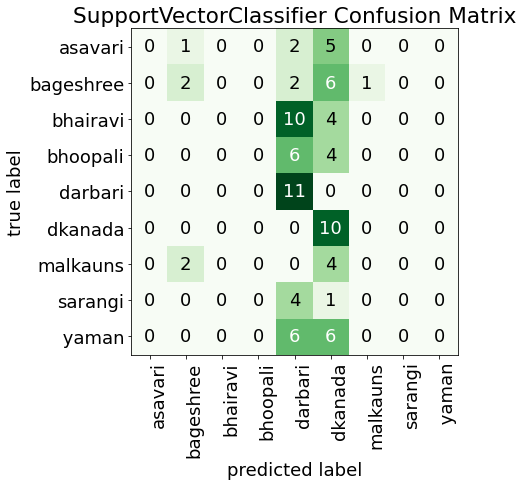

In [29]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_test,predictions_svm),
                        class_names=["asavari", "bageshree", "bhairavi", "bhoopali", "darbari", "dkanada", "malkauns", "sarangi"," yaman"],
                        figsize=(6,6),
                        cmap=plt.cm.Greens)
plt.title(label="SupportVectorClassifier Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

<center><h1 class="list-group-item list-group-item-success">Algorithm-2 RandomForestClassifier</h1></center>

## Model Building

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model = rfc_model.fit(X_train,y_train)

## Model Prediction

In [31]:
predictions_rf = rfc_model.predict(X_test)

## Result Analysis

***Accuracy***

In [32]:
acc_rf = accuracy_score(y_true=y_test, y_pred= predictions_rf)
print("Overall accuracy of ADA model using test-set is : %f" %(acc_rf*100))

Overall accuracy of ADA model using test-set is : 100.000000


***Classification Report***

In [33]:
print(classification_report(y_test,predictions_rf,target_names=["asavari", "bageshree", "bhairavi", "bhoopali", "darbari", "dkanada", "malkauns", "sarangi"," yaman"]))

              precision    recall  f1-score   support

     asavari       1.00      1.00      1.00         8
   bageshree       1.00      1.00      1.00        11
    bhairavi       1.00      1.00      1.00        14
    bhoopali       1.00      1.00      1.00        10
     darbari       1.00      1.00      1.00        11
     dkanada       1.00      1.00      1.00        10
    malkauns       1.00      1.00      1.00         6
     sarangi       1.00      1.00      1.00         5
       yaman       1.00      1.00      1.00        12

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



***Confusion Matrix***

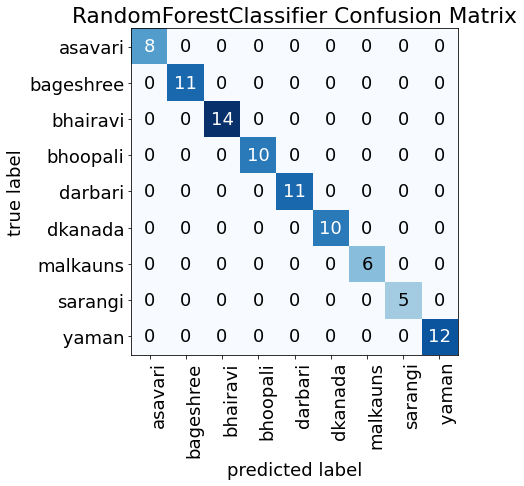

In [34]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_test,predictions_rf),
                        class_names=["asavari", "bageshree", "bhairavi", "bhoopali", "darbari", "dkanada", "malkauns", "sarangi"," yaman"],
                        figsize=(6,6),
                        cmap=plt.cm.Blues)
plt.title(label="RandomForestClassifier Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

<center><h1 class="list-group-item list-group-item-success">Algorithm-3 KNeighborsClassifier</h1></center>

## Model Building

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Model Prediction

In [36]:
predictions_knn = knn_model.predict(X_test)

## Result Analysis

***Accuracy***

In [37]:
acc_knn = accuracy_score(y_true=y_test, y_pred= predictions_knn)
print("Overall accuracy of KNN model using test-set is : %f" %(acc_knn*100))

Overall accuracy of KNN model using test-set is : 100.000000


***Classification Report***

In [38]:
print(classification_report(y_test, predictions_knn,target_names=["asavari", "bageshree", "bhairavi", "bhoopali", "darbari", "dkanada", "malkauns", "sarangi"," yaman"]))

              precision    recall  f1-score   support

     asavari       1.00      1.00      1.00         8
   bageshree       1.00      1.00      1.00        11
    bhairavi       1.00      1.00      1.00        14
    bhoopali       1.00      1.00      1.00        10
     darbari       1.00      1.00      1.00        11
     dkanada       1.00      1.00      1.00        10
    malkauns       1.00      1.00      1.00         6
     sarangi       1.00      1.00      1.00         5
       yaman       1.00      1.00      1.00        12

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



***Confusion Matrix***

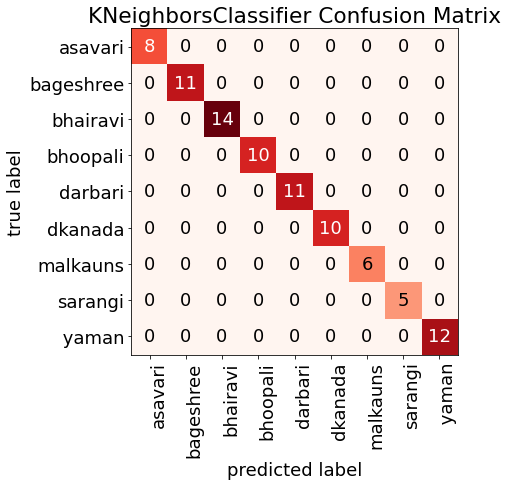

In [39]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_test,predictions_knn),
                        class_names=["asavari", "bageshree", "bhairavi", "bhoopali", "darbari", "dkanada", "malkauns", "sarangi"," yaman"],
                        figsize=(6,6),
                        cmap=plt.cm.Reds)
plt.title(label="KNeighborsClassifier Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

<center><h1 class="list-group-item list-group-item-success">Saving Trained Models</h1></center>

In [40]:
import pickle

In [41]:
pickle.dump(obj=model_svm,file=open("model/SupportVectorClassifier_model.pkl",mode="wb"))

In [42]:
pickle.dump(obj=rfc_model,file=open("model/RandomForestClassifier_model.pkl",mode="wb"))

In [43]:
pickle.dump(obj=knn_model,file=open("model/KNeighborsClassifier_model.pkl",mode="wb"))

<center><h1 class="list-group-item list-group-item-success">Models Accuracy Comparision</h1></center>

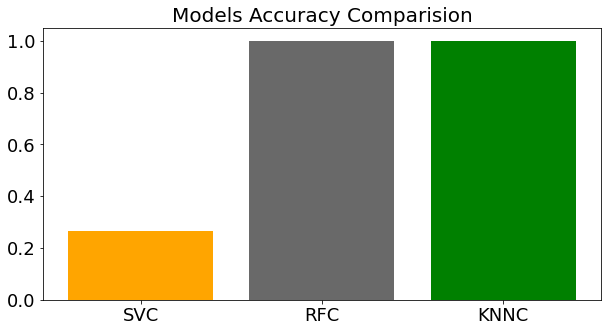

In [44]:
accuracy_data=[acc_svm,acc_rf,acc_knn]
labels=["SVC","RFC","KNNC"]
colors=["orange","dimgray","green"]
plt.figure(figsize=(10,5))
plt.bar(x=labels,height=accuracy_data,color=colors)
plt.title("Models Accuracy Comparision",fontsize=20)
plt.show()

## Thank You